# Relativity Python mini-project: Simulation of a neutrino beam

## 1. PARENT-PARTICLE REST FRAME
    
Consider a generic 2-body decay $A \rightarrow B + C$ with masses $m_A$, $m_B$, $m_C$. You should have already thought through the physics of this in the seminar.

We will consider below the specific example of decays of pions ($\pi$), and kaons ($K$) into a lepton ($L$) and its associated neutrino ($\nu_L$):  $\pi$, $K \rightarrow L+\nu_L$.

There are three types of charged lepton known and each has a corresponding neutrino - the electron $e$ and electron neutrino $\nu_e$; their heavier analogues the muon $\mu$ and muon neutrino $\nu_\mu$; and heavier still, the tau $\tau$ and tau neutrino $\nu_\tau$.

For the particle (rest-)masses, use the approximations:
\begin{align*}
m_\pi &= 140\,\text{MeV/$c^2$} \\
m_K  &= 490\,\text{MeV/$c^2$} \\
m_e &= 511\,\text{keV/$c^2$} \\
m_{\nu_e} &= 1.1 \,\text{eV/$c^2$} \\
m_\mu &= 105\,\text{MeV/$c^2$}\\
m_{\nu_\mu} &= 0.19\,\text{MeV/$c^2$} \\
m_\tau &= 1777\,\text{MeV/$c^2$} \\
m_{\nu_\tau} &= 18.2 \,\text{MeV/$c^2$} \\
\end{align*}

In places below, we'll use the abbreviations rf refer to the rest frame (of the parent particle) and lf for the lab frame

In [1]:
#for simplicity, work with SI units for all variables, function inputs and function outputs.
#For showing in more convenient units (MeV or MeV/c for momentum, MeV/c^2 for mass etc) 
#do a unit conversion wherever these are needed (e.g. within print statements)
#
#also, will avoid redefining quantities for different decays and frames
#instead use _pi _K _rf _lf subscripts
#should minimise likelihood of using the wrong quantity by mistake!

### 1.1 Write a function which calculates the energy of the product particle $B$ in the rest frame of the parent particle

In [383]:
e=1.602e-19

c=3e8 #speed of light
eM=e*1e6 #useful for converting energies from notebook units (SI) to MeV

eG=eM*1e3 #useful for converting energies from notebook units (SI) to GeV

def findEProdB_rf(ma,mb,mc): # Changed function name to specify the particle (B) for which we want to calculate its energy.
    #initial momentum=0 in parent rest frame
    #return energy in SI units for inputs in SI units
    return c**2*(ma**2+mb**2-mc**2)/(2*ma) # mb and mc need to be switched places.

### 1.2  For the decay $\pi, K \rightarrow e+\nu_e$, use the function you've just written to calculate the energy of the $\nu_e$ in the parent-particle rest frame: Enu\_rf\_pi for the pion decay and Enu\_rf\_K for the kaon decay.

In [384]:
u=eG/(c**2) #convert from GeV/c^2 to notebook units (SI) i.e. kg
mpi=0.140*u #units GeV; convert to notebook units (SI) kg
mK=0.490*u
me= 0.511e-3*u 
mnu_e=1.1e-9*u 
# All masses in kg (converted from GeV)

Enu_rf_pi_e = findEProdB_rf(mpi,mnu_e,me) #in notebook units (SI) # Switched places of me and mnu_e.
print(Enu_rf_pi_e/eG,' GeV')

Enu_rf_K_e = findEProdB_rf(mK,mnu_e,me)
print(Enu_rf_K_e/eG,' GeV')

0.069999067425  GeV
0.24499973355000004  GeV


### 1.3 Now for the decay $\pi, K \rightarrow\mu+\nu_\mu$, calculate the energy of the $\nu_\mu$ in the parent-particle rest frame: Enu\_rf\_pi for the pion decay and Enu\_rf\_K for the kaon decay.

In [385]:
mmu=0.105*u
mnu=0.19e-3*u

Enu_rf_pi=findEProdB_rf(mpi,mnu,mmu)
print(Enu_rf_pi/eG,' GeV')

Enu_rf_K=findEProdB_rf(mK,mnu,mmu)  
print(Enu_rf_K/eG,' GeV')

0.030625128928571443  GeV
0.23375003683673473  GeV


### 1.4 Finally, for the decay $\pi, K \rightarrow\tau+\nu_\tau$,calculate the energy of the $\nu_\tau$ in the parent-particle rest frame: Enu\_rf\_pi for the pion decay and Enu\_rf\_K for the kaon decay.

In [390]:
mtau=1.777*u 
mnu_tau=18.2e-3*u

Enu_rf_pi_tau=findEProdB_rf(mpi,mnu_tau,mtau)
print(Enu_rf_pi_tau/eG,' GeV')

Enu_rf_K_tau=findEProdB_rf(mK,mnu_tau,mtau)  
print(Enu_rf_K_tau/eG,' GeV')

-11.206420571428572  GeV
-2.976834448979591  GeV


## FROM NOW ON WE WILL STUDY JUST THE DECAY $\rightarrow \mu + \nu_\mu$ 

### 1.5 (a) Write a function to calculate the 3-momentum (again in the parent-particle rest frame) of particle $C$ as a function of its polar angle $\theta$ with respect to the $z$-axis and azimuthal angle $\phi$.

In [391]:
import numpy as np

def findEProdC_rf(ma,mb,mc): 
    #initial momentum=0 in parent rest frame
    #return energy in SI units for inputs in SI units
    return c**2*(ma**2+mc**2-mb**2)/(2*ma)

def find3mtmC_rf(ma,mb,mc,theta,phi): #3-momentum p of particle C 
    p=np.sqrt((findEProdC_rf(ma,mb,mc)**2)/(c**2)-mc**2*c**2)
    return p*np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])

### 1.5. (b) Use the functions above to calculate the 3-momentum of $\nu$ for both the $\pi$ decay and the $K$ decay in the parent-particle rest frame, for a particular value $\theta=30º$ and assuming the decay happens on the plane $x = 0$.

In [393]:
theta=np.pi/6
phi=np.pi/2

p_nu_rf_pi=find3mtmC_rf(mpi,mmu,mnu,theta,phi)
p_nu_rf_K=find3mtmC_rf(mK,mmu,mnu,theta,phi)
print('For theta=%.3f*pi:' % (theta/np.pi))
print('For pi decay: 3-mtm of nu in rf is ',p_nu_rf_pi*c/eM,' MeV/c')
print('For K  decay: 3-mtm of nu in rf is ',p_nu_rf_K*c/eM,' MeV/c')

For theta=0.167*pi:
For pi decay: 3-mtm of nu in rf is  [9.37606108e-16 1.53122698e+01 2.65216292e+01]  MeV/c
For K  decay: 3-mtm of nu in rf is  [7.15652850e-15 1.16874980e+02 2.02433403e+02]  MeV/c


### 1.6 Write a function that takes as its inputs the energy and 3-momentum of a particle $C$ and returns the 4-momentum in the parent-particle rest frame.

In [394]:
def find4mtm(E,p): #Combine energy and 3-momentum to give four-momentum 
    return np.insert(p, 0, E/c, axis=0) # Insert 

mtm4nu_rf_pi=find4mtm(Enu_rf_pi,p_nu_rf_pi)
mtm4nu_rf_K=find4mtm(Enu_rf_K,p_nu_rf_K)

print('For pi decay: neutrino rf 4-momentum :',mtm4nu_rf_pi*c/eM, ' MeV/c')
print('For K  decay: neutrino rf 4-momentum :',mtm4nu_rf_K*c/eM, ' MeV/c')

For pi decay: neutrino rf 4-momentum : [3.06251289e+01 9.37606108e-16 1.53122698e+01 2.65216292e+01]  MeV/c
For K  decay: neutrino rf 4-momentum : [2.33750037e+02 7.15652850e-15 1.16874980e+02 2.02433403e+02]  MeV/c


### 1.7 Use the functions you have written to make a function find4mtm\_C\_rf(mA,mB,mC,theta,phi) which returns a four-element array of the four-momentum [$E/c$,$p$] of the product particle $C$ in the parent-particle rest frame in SI units ($p$ is the 3-momentum in Cartesian coordinates), where the inputs are the particle masses in SI units, and theta and phi are the angles $\theta$ and $\phi$ in the parent rest frame, as already described.

In [395]:
def find4mtm_C_rf(mA,mB,mC,theta1,phi1):
    EC=findEProdC_rf(mA,mB,mC)    
    p_C=find3mtmC_rf(mA,mB,mC,theta1,phi1) #mtm of product of decay
    return find4mtm(EC,p_C)

### 1.8a Write a function for a general two-body decay that, given the 4-momentum of particles $A$ and $C$, uses 4-momentum conservation to compute the 4-momentum of particle $B$ and returns the direction of travel of particle B in spherical coordinates, ($\theta_B,\phi_B$).

In [396]:
def findangleB(mtm4A,mtm4C):
    mtm4B=mtm4A-mtm4C
    phiB=np.arctan2(mtm4B[2],mtm4B[1])
    pxyB=np.sqrt(mtm4B[1]**2+mtm4B[2]**2)
    thetaB=np.arctan2(pxyB,mtm4B[3])
    return thetaB,phiB

#### 1.8b Use this function, and the 4-momentum of the neutrino for the decay from 1.5(b) to compute the direction of travel of the generated muon in the pion rest frame.  Does this match your expectation? ***COMMENT IN YOUR DEBUGGING REPORT***

In [397]:
print('PION DECAY:')
mtm4pi_rf_pi=find4mtm(mpi*c**2,np.zeros(3))
theta_pi,phi_pi=findangleB(mtm4pi_rf_pi,mtm4nu_rf_pi)
print('muon theta ',theta_pi/np.pi,'pi')
print('muon phi ',phi_pi/np.pi,'pi')

print('KAON DECAY:')
mtm4K_rf_K=find4mtm(mK*c**2,np.zeros(3))
theta_K,phi_K=findangleB(mtm4K_rf_K,mtm4nu_rf_K)
print('muon theta ',theta_K/np.pi,'pi')
print('muon phi ',phi_K/np.pi,'pi')

PION DECAY:
muon theta  0.8333333333333334 pi
muon phi  -0.5000000000000001 pi
KAON DECAY:
muon theta  0.8333333333333334 pi
muon phi  -0.5000000000000001 pi


## 2. LAB FRAME
Now let's think about the same quantities you've just been considering, this time in the lab frame.

### 2.0(a) For a *general* particle with a certain mass and energy in a particular frame, write a function which finds the value of $\beta = v/c$ and another that returns $\gamma$ for the particle in that frame.

In [398]:
def findbeta(E,m):
    p = np.sqrt(E**2-m**2*c**4)/c
    return p*c/E

def findgamma(beta):
    return 1/np.sqrt(1-beta**2)

### We'll now assume that the $\pi$ and $K$ are travelling in the lab frame with energy 1 GeV in direction $+z$.

### 2.0(b) Consider separately the decays of the K particle and the $\pi$ particle. For each decay, calculate the value of  $\beta$  *of the lab frame* as seen by the parent-particle rest frame.

In [400]:
# beta of lab frame as seen by parent-particle rest frame = NEGATIVE
EA_lf_pi=1e9*e #1GeV convert to SI
EA_lf_K=1e9*e #1GeV convert to SI
beta_lf_pi=-findbeta(EA_lf_pi,mpi)
beta_lf_K=-findbeta(EA_lf_K,mK)
print('beta of lab from pi rest frame is ',beta_lf_pi)
print('gamma of lab from pi rest frame is ',findgamma(beta_lf_pi))
print('beta of lab from K rest frame is ',beta_lf_K)
print('gamma of lab from K rest frame is ',findgamma(beta_lf_K))

beta of lab from pi rest frame is  -0.990151503558925
gamma of lab from pi rest frame is  7.142857142857111
beta of lab from K rest frame is  -0.8717224328879003
gamma of lab from K rest frame is  2.0408163265306114


### 2.0(c) Assuming that the pion and kaon lifetimes $t_{rf}$ observed in their rest frames are $2.6·10^{-8} s$ and  $1.2·10^{-8} s$, respectively, compute their lifetime in the lab frame $t_{lf}$.

In [401]:
tau_rf_pi = 2.6e-8
tau_lf_pi = tau_rf_pi/np.sqrt(1-beta_lf_pi**2) # multiply by gamma
print('Pi lifetime (in s) in rf:', tau_rf_pi)
print('Pi lifetime (in s) in lf:', tau_lf_pi)

tau_rf_K = 1.2e-8 
tau_lf_K = tau_rf_K/np.sqrt(1-beta_lf_K**2)
print('K lifetime (in s) in rf:', tau_rf_K)
print('K lifetime (in s) in lf:', tau_lf_K)

Pi lifetime (in s) in rf: 2.6e-08
Pi lifetime (in s) in lf: 1.857142857142849e-07
K lifetime (in s) in rf: 1.2e-08
K lifetime (in s) in lf: 2.4489795918367336e-08


### 2.0(d) Generalise this to considering other pion and kaon energies: compute the ratio $t_{lf}/t_{rf}$ for a range of realistic values of $\beta$

<ipython-input-402-354fb595a461>:3: RuntimeWarning: divide by zero encountered in true_divide
  ratio = 1/np.sqrt(1-beta_range**2)


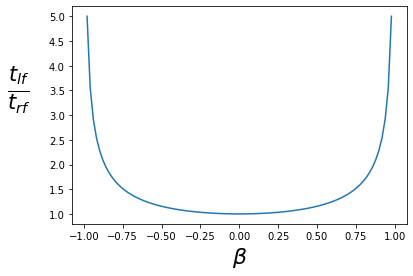

In [402]:
import matplotlib.pyplot as plt
beta_range = np.linspace(-1, 1, 100)
ratio = 1/np.sqrt(1-beta_range**2)
plt.plot(beta_range, ratio)
plt.xlabel(r'$\beta$', fontsize=22)
plt.ylabel(r'$\frac{t_{lf}}{t_{rf}}$', fontsize=30, rotation=0, labelpad=30)
plt.show()

### 2.1 For the 1GeV pi decay, consider what happens if, following the decay, the muon emits a photon in the $+z$ direction, with frequency $f_{rf}$ in the pion's rest frame:
Identifying $f_{lf}$ as the frequency in the lab frame, calculate the ratio $r=f_{lf}/f_{rf}$.

Now plot the energy of the photon in the lab frame $E_{lf}$ as a function of the energy of the photon in the pion's rest frame, $E_{rf}$, as $E_{rf}$ varies. Choose a sensible range of energies for the plot.

f_{lf}/f_{rf} =  14.215367882563706


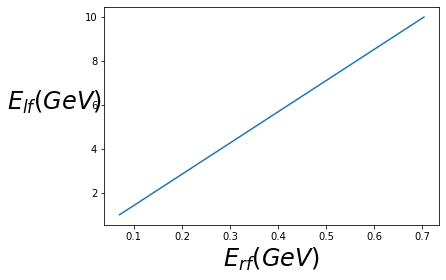

In [403]:
# Since photon is emitted in the direction of motion of pi's rest frame (+z direction) as seen from lab frame --> blue shift.
beta_lf_pi = -findbeta(EA_lf_pi,mpi)
r = np.sqrt((1-beta_lf_pi)/(1+beta_lf_pi))
print("f_{lf}/f_{rf} = ", r)
Elf = np.linspace(1, 10, 100) 
plt.plot(Elf/r, Elf)
plt.xlabel(r'$E_{rf} (GeV)$', fontsize=24)
plt.ylabel(r'$E_{lf} (GeV)$', fontsize=24, rotation=0, labelpad=30)
plt.show()

### 2.2a Write a function which allows you to boost a 4-momentum along the positive z-axis

In [404]:
def boosted4mtm(m4,beta_b): #for boost along z-axis
    gamma_b=findgamma(beta_b)
    m4b0=gamma_b*m4[0]-beta_b*gamma_b*m4[3]
    m4b3=gamma_b*m4[3]-beta_b*gamma_b*m4[0]
    return np.array([m4b0,m4[1],m4[2],m4b3])

###  2.2b Compute the velocity of the neutrino in the lab frame from the 4-momentum in the lab frame. Compare the z-component of this result with what you obtain by applying the velocity addition formula in the rest frame. 

In [405]:
#not sure how well this bit is going to work dealing with small neutrino masses in SI units
#very small numbers - possibly precision problems?
#maybe natural units would be better? 
#should be able to switch notebook to all quantities being natural units based on MeV instead of SI 
#just by setting c=1 and eM=1 at top of notebook
#would give energy unit MeV, momentum unit MeV/c, mass unit MeV/c^2, velocity unit c
#check this later

m4_nu_rf_pi=find4mtm(Enu_rf_pi, p_nu_rf_pi) # deleted *eG
v_nu_rf_pi = m4_nu_rf_pi[1:]/(mnu*findgamma(-beta_lf_pi)) 
vz_rf = v_nu_rf_pi[-1] # just z-component
vz_lf = (vz_rf-beta_lf_pi*c)/(1-(beta_lf_pi*vz_rf/c))

m4_nu_lf_pi=boosted4mtm(m4_nu_rf_pi,beta_lf_pi)
v_nu_lf_pi2 = m4_nu_lf_pi[-1]/(mnu*findgamma(-beta_lf_pi)) # changed 1: to -1
print('Pi neutrino velocity lf from velocity addition', vz_lf,' m/s')
print('Pi neutrino velocity lf from 4-mom in that frame', v_nu_lf_pi2,' m/s')

# For the second parent particle
m4_nu_rf_K=find4mtm(Enu_rf_K,p_nu_rf_K) # deleted *eG
v_nu_rf_K = m4_nu_rf_K[1:]/(mnu*findgamma(-beta_lf_K))
vz_rf = v_nu_rf_K[-1] # just z-component
vz_lf = (vz_rf-beta_lf_K*c)/(1-(beta_lf_K*vz_rf/c))

m4_nu_lf_K=boosted4mtm(m4_nu_rf_K,beta_lf_K)
v_nu_lf_K2 = m4_nu_lf_K[-1]/(mnu*findgamma(-beta_lf_K)) # changed 1: to -1
print('K neutrino velocity lf from velocity addition', vz_lf,' m/s')
print('K neutrino velocity lf from 4-mom in that frame', v_nu_lf_K2,' m/s')

Pi neutrino velocity lf from velocity addition 302692115.77266365  m/s
Pi neutrino velocity lf from 4-mom in that frame 89755494748.57275  m/s
K neutrino velocity lf from velocity addition 343965075.7605291  m/s
K neutrino velocity lf from 4-mom in that frame 641366137833.6022  m/s


###  2.2c Compute the energy-momentum invariant in the lab and rest frame.

In [406]:
mcheck_pi=c*np.sqrt(m4_nu_rf_pi[0]**2-m4_nu_rf_pi[1]**2-m4_nu_rf_pi[2]**2-m4_nu_rf_pi[3]**2)
print('pi (rf): neutrino sqrt(E^2-p^2c^2)=',mcheck_pi/eM,' MeV')

mcheck_pi2=c*np.sqrt(m4_nu_lf_pi[0]**2-m4_nu_lf_pi[1]**2-m4_nu_lf_pi[2]**2-m4_nu_lf_pi[3]**2)
print('pi (lf): neutrino sqrt(E^2-p^2c^2)=',mcheck_pi2/eM,' MeV')

mcheck_K=c*np.sqrt(m4_nu_rf_K[0]**2-m4_nu_rf_K[1]**2-m4_nu_rf_K[2]**2-m4_nu_rf_K[3]**2)
print(' K (rf): neutrino sqrt(E^2-p^2c^2)=',mcheck_K/eM,' MeV')

mcheck_K2=c*np.sqrt(m4_nu_lf_K[0]**2-m4_nu_lf_K[1]**2-m4_nu_lf_K[2]**2-m4_nu_lf_K[3]**2)
print(' K (lf): neutrino sqrt(E^2-p^2c^2)=',mcheck_K2/eM,' MeV')

pi (rf): neutrino sqrt(E^2-p^2c^2)= 0.1900000000006074  MeV
pi (lf): neutrino sqrt(E^2-p^2c^2)= 0.19000000001152212  MeV
 K (rf): neutrino sqrt(E^2-p^2c^2)= 0.19000000001152212  MeV
 K (lf): neutrino sqrt(E^2-p^2c^2)= 0.18999999967429484  MeV


### 2.2d At what angle is the neutrino travelling in the lab frame? Use the function you wrote in 1.8a to find the angle at which the muon is travelling in the lab frame. Does this match your expectation? ***COMMENT IN YOUR DEBUGGING REPORT***

In [407]:
print('PION DECAY:')
phiC_lf_pi=np.arctan2(m4_nu_lf_pi[2],m4_nu_lf_pi[1])
thetaC_lf_pi=np.arctan2(np.sqrt(m4_nu_lf_pi[1]**2+m4_nu_lf_pi[2]**2),m4_nu_lf_pi[3])

print('neutrino theta (lf):',thetaC_lf_pi/np.pi,'pi')
print('neutrino phi (lf):  ',phiC_lf_pi/np.pi,'pi')

m4_pi_rf_pi=find4mtm(mpi*c**2,np.array([0.,0.,0.]))
m4_pi_lf_pi=boosted4mtm(m4_pi_rf_pi,beta_lf_pi)
theta_lf_pi, phi_lf_pi = findangleB(m4_pi_lf_pi,m4_nu_lf_pi)

print('muon theta (lf):    ',theta_lf_pi/np.pi,'pi')
print('muon phi (lf):      ',phi_lf_pi/np.pi,'pi')

print('KAON DECAY:')
phiC_lf_K=np.arctan2(m4_nu_lf_K[2],m4_nu_lf_K[1])
thetaC_lf_K=np.arctan2(np.sqrt(m4_nu_lf_K[1]**2+m4_nu_lf_K[2]**2),m4_nu_lf_K[3])

print('neutrino theta (lf):',thetaC_lf_K/np.pi,'pi')
print('neutrino phi (lf):  ',phiC_lf_K/np.pi,'pi')

m4_pi_rf_K=find4mtm(mK*c**2,np.array([0.,0.,0.]))
m4_pi_lf_K=boosted4mtm(m4_pi_rf_K,beta_lf_K)
theta_lf_K, phi_lf_K = findangleB(m4_pi_lf_K,m4_nu_lf_K)

print('muon theta (lf):    ',theta_lf_K/np.pi,'pi')
print('muon phi (lf):      ',phi_lf_K/np.pi,'pi')

PION DECAY:
neutrino theta (lf): 0.011998268913915694 pi
neutrino phi (lf):   0.5 pi
muon theta (lf):     0.008342420554739933 pi
muon phi (lf):       -0.5000000000000001 pi
KAON DECAY:
neutrino theta (lf): 0.04458372279882963 pi
neutrino phi (lf):   0.5 pi
muon theta (lf):     0.3883918869446369 pi
muon phi (lf):       -0.5000000000000001 pi


### 2.3 Use the functions you have written to make a function find4mtm\_C\_lf(mA,mB,mC,theta,phi,EA) 
which returns a four-element array of the four-momentum [$E/c$,$p$] of the product particle $C$ in the lab frame, with $E/c$ and $p$ both in SI units ($p$ is the 3-momentum in Cartesian coordinates), where the inputs are the particle masses mA, mB and mC in SI units, theta and phi, the angles are the $\theta$ and $\phi$ already described and EA, the parent-particle energy in the lab frame in SI units.

In [408]:
def find4mtm_C_lf(mA,mB,mC,theta1,phi1,EA):
    beta_lf_A=-findbeta(EA,mA)
    m4_nu_rf_C=find4mtm_C_rf(mA,mB,mC,theta1,phi1) # from section 1.7
    return boosted4mtm(m4_nu_rf_C,beta_lf_A)

### 2.4 What are the maximum and minimum values of the energy the product neutrino can have, in the lab frame, when the parent particle has energy 1 GeV? 

Define four variables Enu\_lf\_pi\_min, Enu\_lf\_pi\_max, Enu\_lf\_K\_min and Enu\_lf\_K\_max to contain these values, in SI units.

In [409]:
m4max_lf_pi=find4mtm_C_lf(mpi,mmu,mnu,0.0,0.0,EA_lf_pi)
print('Max energy in lab frame (pi decay) [fn] is ',m4max_lf_pi[0]*c/eG,' GeV') # multiply all outputs (E/c in SI) by c/eG to convert to energy in GeV. 
Enu_lf_pi_max = m4max_lf_pi[0]*c

m4min_lf_pi=find4mtm_C_lf(mpi,mmu,mnu,np.pi,0.0,EA_lf_pi)
print('Min energy in lab frame (pi decay) [fn] is ',m4min_lf_pi[0]*c/eG,' GeV')
Enu_lf_pi_min = m4min_lf_pi[0]*c

m4max_lf_K=find4mtm_C_lf(mK,mmu,mnu,0.0,0.0,EA_lf_pi)
print('Max energy in lab frame (K decay) [fn] is ',m4max_lf_K[0]*c/eG,' GeV') 
Enu_lf_K_max = m4max_lf_K[0]*c

m4min_lf_K=find4mtm_C_lf(mK,mmu,mnu,np.pi,0.0,EA_lf_pi)
print('Min energy in lab frame (K decay) [fn] is ',m4min_lf_K[0]*c/eG,' GeV')
Enu_lf_K_min = m4max_lf_K[0]*c

Max energy in lab frame (pi decay) [fn] is  0.4353433056967957  GeV
Min energy in lab frame (pi decay) [fn] is  0.0021585361399373273  GeV
Max energy in lab frame (K decay) [fn] is  0.8928880006570105  GeV
Min energy in lab frame (K decay) [fn] is  0.06119378235006974  GeV


## 3. ENERGY DISTRIBUTIONS

The purpose of this part is to simulate what you would find in a real experiment using the code previously written. By treating each decay event as a random and independent process, we hope to simulate decays in a realistic manner.

#### PRELIMINARIES 
#### Understanding the RANDOM NUMPY library

In [410]:
import numpy as np

print('A random number between 0 and 1: ',np.random.rand())
print('A random number between 0 and 10: ',10 * np.random.rand())
print('An array of 20 random numbers between 0 and 10:', np.random.randint(10, size=20)) 

A random number between 0 and 1:  0.9541270999628747
A random number between 0 and 10:  6.749793839705752
An array of 20 random numbers between 0 and 10: [5 0 7 1 8 0 5 7 1 1 8 9 7 7 7 2 0 4 3 6]


#### What do you expect the distribution of random numbers to be like? To answer this question, we sample a sufficiently large set of numbers between 0 and 10 (both limits included) and plot the distribution of values.

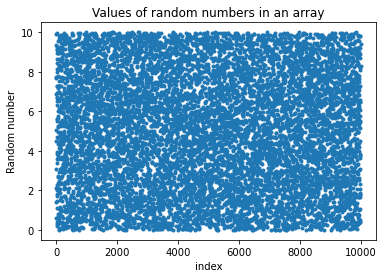

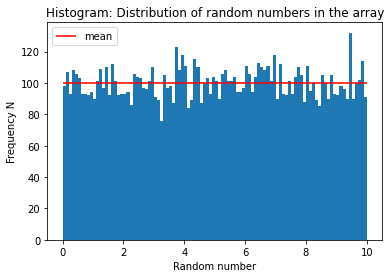

In [411]:
## Import plotting library
import matplotlib.pyplot as plt

Ns = 10000
random_numbers=10*np.random.rand(Ns)
plt.plot(random_numbers,'.')
plt.xlabel('index')
plt.ylabel('Random number')
plt.title('Values of random numbers in an array')
plt.show()

## Make a histogram of the list and include a horizontal line indicating the expected value  
Nbins = 100
plt.hist(random_numbers, bins=Nbins)
plt.hlines(xmin=0, xmax=10, y=Ns/Nbins, color='r', label='mean')
plt.xlabel('Random number')
plt.ylabel('Frequency N')
plt.title('Histogram: Distribution of random numbers in the array')
plt.legend()
plt.show()

#### Sometimes you may want to generate a set of values that are not uniformly distributed, but instead some values are generated more frequently than others. There are predefined functions for some of these cases (such as for a Gaussian). For other specific cases, it may be necessary to define the function from which the sample is to be taken. In the following example, we'll demonstrate this using the $p(x)=(x/x_{max})^2$ (with $x\leq xmax$) distribution. 

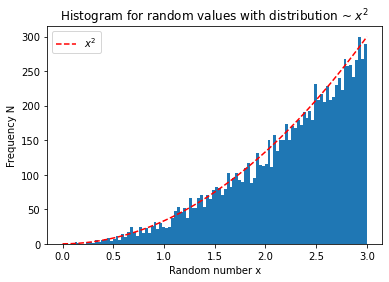

In [412]:
xmin = 0
xmax = 3
x_domain = [xmin, xmax] #domain of x will be xmin<=x<=xmax

def distribn_normalised(x): #p(x) distribution function; max value for domain should be 1
    return (x**2)/(xmax**2) 

def generate_x_array(Nevents, x_domain):
    """
    This function yields an array of values of x in the interval x_domain distributed 
    according to a distribution such that f(x) dx=x^2 dx
    The array is of length Narray
    """
    xvals = []
    lenout = 0 
    Nchunk = Nevents #number of random variables to generate each iteration of the while loop
    while lenout < Nevents: 
        xnew = x_domain[1] * np.random.rand(Nchunk) #generate new prospective values for x from a uniform distribution
        y1 = np.random.rand(Nchunk) #random number between 0 and 1 will determine whether to keep each x value
        # the frequency at which values are kept is proportional to the value of distribn_normalised
        xvals = np.append(xvals, xnew[y1 < distribn_normalised(xnew)]) 
        lenout = len(xvals) #check whether sufficient values have been generated yet
    return xvals[:Nevents] #return an array of the correct length

Nevents = 10000
Nbins = 100
distribn=generate_x_array(Nevents, x_domain)
plt.hist(distribn, bins=Nbins)

#make an x^2 line for comparison
x2=np.linspace(x_domain[0], x_domain[1], 100)
y2=(3*Nevents/(Nbins*xmax**2))*x2**2
#x^2 coefficient set so that (area under curve)=(bin width * Nevents) gives match to histogram
plt.plot(x2,y2,'r--',label='$x^2$')

plt.xlabel('Random number x')
plt.ylabel('Frequency N')
plt.legend()
plt.title('Histogram for random values with distribution ~ $x^2$')
plt.show()

### 3.0(a) Now think about how to apply this to simulate $N_{events}$ particle decays: rather than assuming a single value of $\theta$ as we have been so far, we need to generate a realistic distribution of $\theta$ across multiple decay events. What are the allowed $\theta_{rf}$ values for the neutrino (in the parent-particle rest frame) for each decay?  How likely is each angle $\theta_{rf}$?  After giving it some thought, you should be able to use a modified version of the code above to generate $\theta_{rf}$ for a series of $N_{events}$ parent-particle decay events and plot a histogram of the distribution of $\theta_{rf}$.

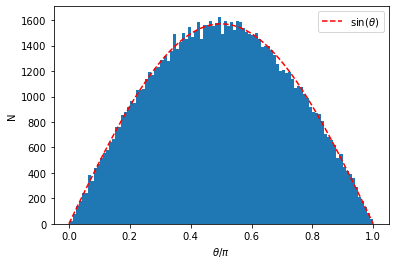

In [413]:
def generate_theta_array(Narray=1):
    """
    This function yields an array of values of theta in the interval [0; pi] distributed according
    to the theta distribution. The array is of length Narray
    """
    thetavals = []
    lenout = 0
    Nchunk = Narray
    while lenout < Narray:
        thetanew = np.pi * np.random.rand(Nchunk)
        prob_theta = 1/2*np.sin(thetanew) #because f(theta)dtheta = 1/2*sin(theta)dtheta # (got rid of one factor of thetanew and multiply by 1/2.)
        norm_prob_theta = prob_theta/np.pi #normalizing factor
        th1 = np.random.rand(Nchunk) #random number between 0 and 1 - keep this value only if less than sin(theta)
        thetavals = np.append(thetavals, thetanew[th1 < norm_prob_theta])
        #sin theta is in the range 0 and 1 for 0<theta<pi so no normalisation is needed.
        lenout = len(thetavals)
    return thetavals[:Narray]

Nevents = 100000

distribn = generate_theta_array(Nevents)
plt.hist(distribn/np.pi, bins = Nbins)

#make an sin(x) line for comparison # (removed factor of x to make an sin(x) line for comparison.)
x3=np.linspace(0, np.pi, 100)
y3=(np.pi*Nevents/Nbins)*1/2*np.sin(x3) # got rid of 1/3 factor and replace with 1/2 factor since 1/2 sin(theta).d(theta).
#coefficient set so that (area under curve)=(bin width * Nevents) gives match to histogram
xpi_range = np.linspace(0, 1, 100)
plt.plot(xpi_range, y3,'r--',label=r'$\sin(\theta)$')

plt.xlabel(r'$\theta/\pi$')
plt.ylabel('N')
plt.legend()
plt.show()

### 3.1(a) Calculate the distributions of neutrino energies in the lab frame as a function of $\theta_{rf}$, for pion decays and for kaon decays, assuming parent particles with energy 1 GeV in the lab frame.

In [425]:
#EA_lf_pi and EA_lf_K defined earlier
#choose some number of decay events for each type:
Nrun_pi= 100000
Nrun_K= 100000

#Generate theta values using the previously defined function:
theta_rf_pi=generate_theta_array(Nrun_pi)
theta_rf_K=generate_theta_array(Nrun_K)            
                                   
# Define versions of previous functions which can handle arrays for different theta values
def find4mtmar(Efm,pfm): #Combine energy and 3-momentum to give four-momentum
    return np.insert(pfm, 0, Efm/c, axis=0)
def boosted4mtmar(m4,beta_b): #for boost along z-axis when dealing with an array
    gamma_b=findgamma(beta_b)
    return np.array([gamma_b*m4[0,:]-beta_b*gamma_b*m4[3,:],m4[1,:],m4[2,:],gamma_b*m4[3,:]-beta_b*gamma_b*m4[0,:]])

#calculate for pi decays first
gamma_v_pi=(EA_lf_pi/(mpi*c**2))
beta_v_pi= -np.sqrt(1-1/(gamma_v_pi**2)) #beta of lab frame wrt rest frame
#find neutrino energy in pion rest frame
energy_nu_rf_pi=findEProdC_rf(mpi, mmu, mnu) #Energy of particle C in pion rest frame indpt of angle theta_rf
# Rest frame 3-momentum of nutrino for range of theta at some given phi. 
m3_nu_rf_pi_ar = find3mtmC_rf(mpi,mmu,mnu,theta_rf_pi,phi) # changed name to m3_nu_rf_pi_ar and propagated.
# Rest frame 4-momentum of nutrino for range of theta at some given phi.
m4_nu_rf_pi_ar = find4mtmar(energy_nu_rf_pi, m3_nu_rf_pi_ar)
# Lab frame 4-momentum of neutrino
m4_nu_lf_pi_ar = boosted4mtmar(m4_nu_rf_pi_ar, beta_v_pi)
# Lab frame energy of neutrino at range of theta and given phi (SI)
energy_nu_lf_pi = m4_nu_lf_pi_ar[0]*c

# Alternative method for calculating neutrino energy distribution using lorentz transformation.
energy_nu_lf_pi2 = gamma_v_pi*energy_nu_rf_pi - beta_v_pi*gamma_v_pi*m3_nu_rf_pi_ar[2,:]*c # removed /(1e9*e)
    
    
#now calculate for K decays:
gamma_v_K = (EA_lf_K/(mK*c**2))
beta_v_K = -np.sqrt(1-1/(gamma_v_K**2)) #beta of lab frame wrt rest frame
#find neutrino energy in kaon rest frame
energy_nu_rf_K=findEProdC_rf(mK,mmu,mnu) #particle C in kaon rest frame indpt of angle theta_rf
# Rest frame 3-momentum of nutrino for range of theta at some given phi. 
m3_nu_rf_K_ar = find3mtmC_rf(mK,mmu,mnu,theta_rf_K,phi) # changed name to m3_nu_rf_pi_ar and propagated.
# Rest frame 4-momentum of nutrino for range of theta at some given phi.
m4_nu_rf_K_ar = find4mtmar(energy_nu_rf_K, m3_nu_rf_K_ar)
# Lab frame 4-momentum of neutrino
m4_nu_lf_K_ar = boosted4mtmar(m4_nu_rf_K_ar, beta_v_K)
# Lab frame energy of neutrino at range of theta and given phi (SI)
energy_nu_lf_K = m4_nu_lf_K_ar[0]*c

# Alternative method for calculating neutrino energy distribution using lorentz transformation.
energy_nu_lf_K2 = gamma_v_K*energy_nu_rf_K - beta_v_K*gamma_v_K*m3_nu_rf_K_ar[2,:]*c # removed /(1e9*e)


### 3.1(b) Find the analytical form of the dependence between the energy of the product neutrino in the lab frame, Enu_lf, and the angle $\theta$ in the rest frame. Plot it together with the numerial results that you obtained above. 

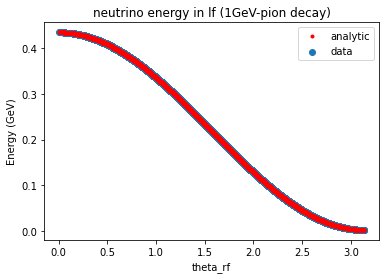

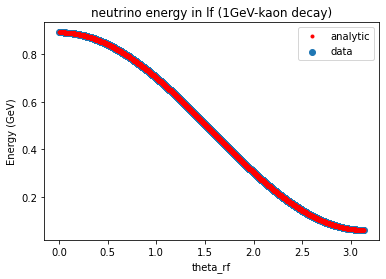

In [426]:
# find new expressions of energy distributions (Ean_pi and Ean_K) using Lorentz transformation
Ean_pi = gamma_v_pi*(energy_nu_rf_pi - beta_v_pi*np.cos(theta_rf_pi)*np.sqrt(energy_nu_rf_pi**2-mnu**2*c**4))
Ean_K = gamma_v_K*(energy_nu_rf_K - beta_v_K*np.cos(theta_rf_K)*np.sqrt(energy_nu_rf_K**2-mnu**2*c**4))

plt.scatter(theta_rf_pi,energy_nu_lf_pi/eG,label='data') # divide energy inputs by eG to plot in GeV.
plt.plot(theta_rf_pi, Ean_pi/eG,'r.',label='analytic')
plt.xlabel('theta_rf')
plt.ylabel('Energy (GeV)')
plt.title('neutrino energy in lf (1GeV-pion decay)')
plt.legend()
plt.show()

plt.scatter(theta_rf_K,energy_nu_lf_K/eG, label='data') # divide energy inputs by eG to plot in GeV.
plt.plot(theta_rf_K,Ean_K/eG,'r.', label='analytic')
plt.xlabel('theta_rf')
plt.ylabel('Energy (GeV)')
plt.title('neutrino energy in lf (1GeV-kaon decay)')
plt.legend()
plt.show()

### 3.1(c) Create plots for both decays of the histograms of Enu_lf.  Can you explain why the plots have the shape they do? If you can, ***include this in your debugging report***.

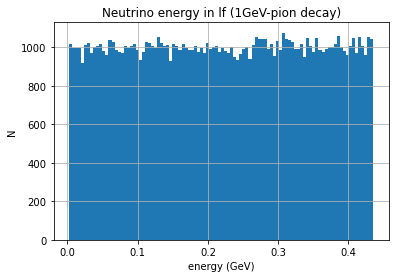

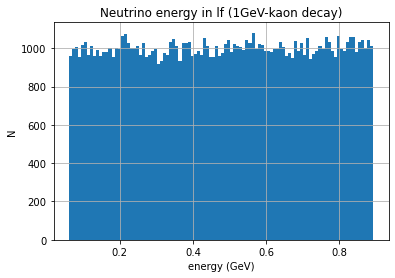

In [429]:
# Consider increasing Nrun_pi and Nrun_K to 100000 each in 3.1(a) to better visualise the uniform distribution.
Nbins=100

(Nb_pi,binsb_pi,bbb_pi)=plt.hist(energy_nu_lf_pi/eG, bins = Nbins)

plt.ylabel('N')
plt.xlabel('energy (GeV)')
plt.grid()
plt.title('Neutrino energy in lf (1GeV-pion decay)')
plt.show()

(Nb_K,binsb_K,bbb_K)=plt.hist(energy_nu_lf_K/eG, bins = Nbins)

plt.ylabel('N')
plt.xlabel('energy (GeV)')
plt.grid()
plt.title('Neutrino energy in lf (1GeV-kaon decay)')
plt.show()

### 3.1(d) Create plots for both decays of the histograms of the angular distribution in the lab frame of the number of neutrinos. Use a log-scale for clarity. 

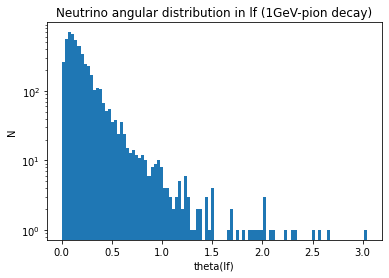

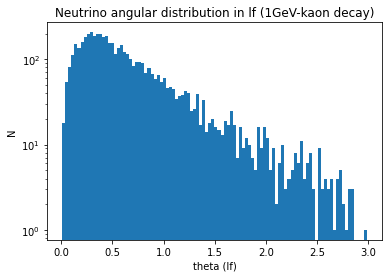

In [417]:
#extract theta_lf from the 4-momentum (remember the first entry is the Energy)
# Convert all of next 2 lines to lf from rf. 
theta_lf_pi_ar=np.arctan2(np.sqrt(m4_nu_lf_pi_ar[1]**2+m4_nu_lf_pi_ar[2]**2),m4_nu_lf_pi_ar[3]) # changes variabels names to those alrady defined  
theta_lf_K_ar=np.arctan2(np.sqrt(m4_nu_lf_K_ar[1]**2+m4_nu_lf_K_ar[2]**2),m4_nu_lf_K_ar[3])

plt.hist(theta_lf_pi_ar, bins = 100, log=True)
plt.ylabel('N')
plt.xlabel('theta(lf)')
plt.title('Neutrino angular distribution in lf (1GeV-pion decay)')
plt.show()

plt.hist(theta_lf_K_ar, bins = 100, log=True)
plt.ylabel('N')
plt.xlabel('theta (lf)')
plt.title('Neutrino angular distribution in lf (1GeV-kaon decay)')
plt.show()

### 3.2 In this final part, you'll create a histogram plot of the distribution of energies of the product neutrinos in the lab frame. Start by assuming that the momenta of the $\pi$ and $K$ beams follow a Chi-squared distribution, and that there are 10$\times$ more $\pi$ decays than $K$ decays in the beam.  **Note**: you can assume that the code between the === in the cell below has been checked carefully and does not contain any errors


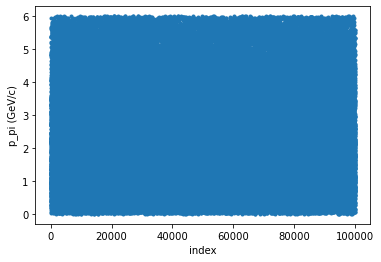

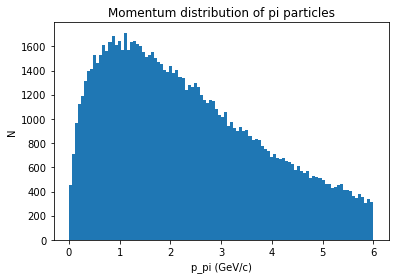

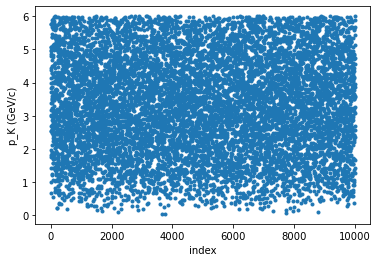

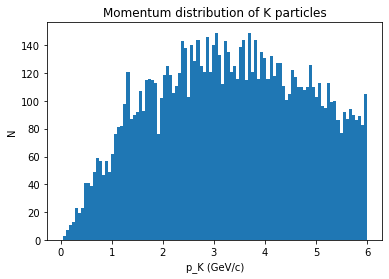

In [418]:
#================
def prob_distrib(x, k=4):
    
    """
    Chi squared PDF, depends on parameters k which modulates the shape and location of distribution
    """
    from scipy.special import gamma # gamma function
    
    if type(x) != np.ndarray:
        if x <=0 :
            return 0
        else:
            return x**(k/2-1) * np.exp(-x/2)/(2**(k/2) * gamma(k/2))
    else:
        x[x<=0] = 1e-40 #replace zero or negative values with 
        return  x**(k/2-1) * np.exp(-x/2)/(2**(k/2) * gamma(k/2))

def max_prob(k=4):
    """
    Returns the mode (the value with the highest probability of occurring) of the distribution
    """
    return k-2

def generate_array(x_min, x_max, k=4, Narray=5000):
    """
    This function yields an array of values of x in the interval [x_min; x_max] distributed according
    to a Chi-squared distribution as defined in chi_squared_distrib(x, k)
    The array is of length Narray
    """
    pxvals=[]
    ymax = prob_distrib(max_prob(k), k) #maximum probability
    lenout=0
    Nchunk=Narray
    while lenout<Narray:
        px = (x_max - x_min) * np.random.rand(Nchunk) + x_min
        py = np.random.rand(Nchunk) * ymax # probability between 0 and the maximum.
        chix = prob_distrib(px, k) # probability for random value in [x_min and x_max]
        pxvals=np.append(pxvals, px[chix>py])
        lenout=len(pxvals)
    return pxvals[:Narray]

# use these values of k throughout
k_pi = 3
k_K  = 5 

# min and max values for energy
E_min = 0. #GeV
E_max = 6. #GeV

#================

# The following code shows how to use the three functions defined above to generate a momentum distribution. 
# Note that the E_min and E_max inputs for generate_array are in GeV, not SI units, and the output is in units of GeV/c

#the function takes an input argument n_samples: the number of values you want to generate in each call
n_samples_pi = 100000
n_samples_K = 10000

#distribution of momentum values for pi decay
mtm_distrib_E_pi=generate_array(E_min, E_max, k_pi, n_samples_pi)

#distribution of momentum values for K decay (uncomment to execute)
mtm_distrib_E_K=generate_array(E_min, E_max, k_K, n_samples_K)
   
plt.plot(mtm_distrib_E_pi,'.')
plt.xlabel('index')
plt.ylabel('p_pi (GeV/c)')
plt.show()
plt.close()

plt.hist(mtm_distrib_E_pi, bins = 100)
plt.xlabel('p_pi (GeV/c)')
plt.ylabel('N')
plt.title('Momentum distribution of pi particles')
plt.show()

# copied another set for K so I can generate all four plots at once. 
plt.plot(mtm_distrib_E_K,'.')
plt.xlabel('index')
plt.ylabel('p_K (GeV/c)')
plt.show()
plt.close()

plt.hist(mtm_distrib_E_K, bins = 100)
plt.xlabel('p_K (GeV/c)')
plt.ylabel('N')
plt.title('Momentum distribution of K particles')
plt.show()

### 3.3(a) In part 3.1 you generated a distribution of neutrino energies in the lab frame assuming a constant parent particle energy.  Repeat this here to plot the histogram of the energies of the product neutrinos, except this time for each decay event drawing the energy of the parent particles from the distribution you have just calculated in 3.2, as well as drawing $\theta$ from the random distribution you used before. 

In [419]:
#generate distribution of parent-particle energies
Nrun_pi = 100000
Nrun_K = 10000

#pi particles :
EA_pi = np.sqrt((mtm_distrib_E_pi*eG)**2+mpi**2*c**4) # calculate energy from energy-momentum invariant. Also convert momenta from GeV/c to SI.
#find corresponding gamma and beta
gamma_v_pi=(EA_pi/(mpi*c**2))
beta_v_pi=-np.sqrt(1-1/(gamma_v_pi**2)) #beta of lab frame wrt rest frame

#K particles:
EA_K = np.sqrt((mtm_distrib_E_K*eG)**2+mK**2*c**4) # calculate to energy from energy-momentum invariant. Also convert momenta from GeV/c to SI.
#find corresponding gamma and beta
gamma_v_K=(EA_K/(mK*c**2))  
beta_v_K=-np.sqrt(1-1/(gamma_v_K**2)) #beta of lab frame wrt rest frame

#theta distribution
# change from random number generation between 0 and 2pi to the actual distribution of rest frame theta defined in section 3.0(a).
theta_rf_pi = generate_theta_array(Nrun_pi)
theta_rf_K = generate_theta_array(Nrun_K)

# phi distribution
# keep to generate random phi between 0 and 2pi
phi_rf_pi = 2*np.pi * np.random.rand(Nrun_pi)
phi_rf_K = 2*np.pi * np.random.rand(Nrun_K)

#calculate for pi decays first:
#find neutrino energy in rest frame
energy_nu_rf_pi=findEProdC_rf(mpi,mmu,mnu) #particle C in rest frame indpt of angle theta_rf
#find neutrino 3-momentum in rest frame
m3_nu_rf_pi_ar=find3mtmC_rf(mpi,mmu,mnu,theta_rf_pi,phi_rf_pi) #particle C (nu) in rest frame     
#find neutrino 4-momentum in rest frame:
m4nu_rf_pi=find4mtmar(energy_nu_rf_pi,m3_nu_rf_pi_ar)

#find neutrino energy in lab frame:
energy_nu_lf_pi=boosted4mtmar(m4nu_rf_pi, beta_v_pi)[0]*c # removed /(1e9*e) to store energy distribution in SI units.
energy_nu_lf_pi2=gamma_v_pi*energy_nu_rf_pi-beta_v_pi*gamma_v_pi*m3_nu_rf_pi_ar[2,:]*c  
    
#K decays
#find neutrino energy in rest frame
energy_nu_rf_K=findEProdC_rf(mK,mmu,mnu) #particle C in rest frame indpt of angle theta_rf
#find neutrino 3-momentum in rest frame
m3_nu_rf_K_ar=find3mtmC_rf(mK,mmu,mnu,theta_rf_K,phi_rf_K) #particle C (nu) in rest frame    
#find neutrino 4-momentum in rest frame:
m4nu_rf_K=find4mtmar(energy_nu_rf_K,m3_nu_rf_K_ar)
  
#find neutrino energy in lab frame:
energy_nu_lf_K=boosted4mtmar(m4nu_rf_K,beta_v_K)[0]*c # removed /(1e9*e) to store energy distribution in SI units.
energy_nu_lf_K2=gamma_v_K*energy_nu_rf_K-beta_v_K*gamma_v_K*m3_nu_rf_K_ar[2,:]*c

### 3.3(b) Now plot, on a single histogram, the energy distribution in the lab frame:
- for the $\pi$ decays only
- for K decays only and 
- for both decays.  

Use a log scale for the energy.  ***INCLUDE THIS PLOT IN YOUR DEBUGGING REPORT***

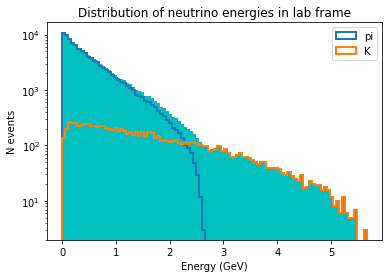

In [421]:
#combine arrays to get neutrino energies from all decays    
energy_nu_lf=np.append(energy_nu_lf_pi,energy_nu_lf_K)
range_energy=[min(energy_nu_lf/eG),max(energy_nu_lf/eG)] # Convert both inputs to GeV (/eG) since this will go on the graph with axis units GeV.

plt.figure()
Nevents,bins,patches=plt.hist(energy_nu_lf/eG, bins = 100, range=range_energy, log=True, color='c') # change range from [0,6] to range_energy
plt.hist(energy_nu_lf_pi/eG, bins=100, range=range_energy, log=True, histtype='step', linewidth=2, label='pi') # Change rf to lf. # Convert both inputs to GeV (/eG)
plt.hist(energy_nu_lf_K/eG, bins=100, range=range_energy, log=True, histtype='step', linewidth=2, label='K')

plt.xlabel('Energy (GeV)')
plt.ylabel('N events')
plt.title('Distribution of neutrino energies in lab frame')
plt.legend()
plt.show()

### Of course, in a real experiment you would measure events from both types of decay together and would have to try to differentiate afterwards. In 3.3(c) and (d), consider two quantities which might be useful for to differentiating the $\pi$ neutrinos and the K neutrinos. Plot the distribution of these for the decay events of the two types which you've been considering.
#### 3.3(c) The value of $\theta_{lf}$ for the neutrino

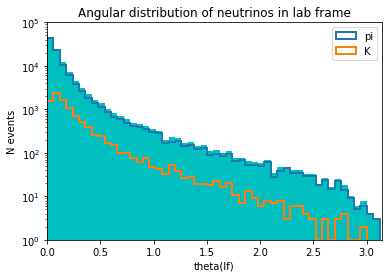

In [422]:
b4_lf_pi=boosted4mtmar(m4nu_rf_pi,beta_v_pi)
theta_lf_pi=np.arctan2(np.sqrt(b4_lf_pi[1]**2+b4_lf_pi[2]**2),b4_lf_pi[3])

b4_lf_K=boosted4mtmar(m4nu_rf_K,beta_v_K)
theta_lf_K=np.arctan2(np.sqrt(b4_lf_K[1]**2+b4_lf_K[2]**2),b4_lf_K[3])

#combine arrays to get neutrino energies from all decays    
theta_nu_lf=np.append(theta_lf_pi,theta_lf_K)
range_theta=[min(theta_nu_lf),max(theta_nu_lf)]

plt.figure()
Nevents,bins,patches=plt.hist(theta_nu_lf, bins = 100, range=[0,6], log=True, color='c')
plt.hist(theta_lf_pi, bins=100, range=[0,6], log=True, histtype='step', linewidth=2, label='pi')
plt.hist(theta_lf_K, bins=100, range=[0,6], log=True, histtype='step', linewidth=2, label='K')

plt.ylim([1e0,1e5])
plt.xlim([0,np.pi])
plt.xlabel('theta(lf)')
plt.ylabel('N events')
plt.legend()
plt.title('Angular distribution of neutrinos in lab frame')
plt.show()

#### 3.3(d) The energy of the neutrino at a particular $\theta_{lf}$. Use a log-scale to represent the energies.

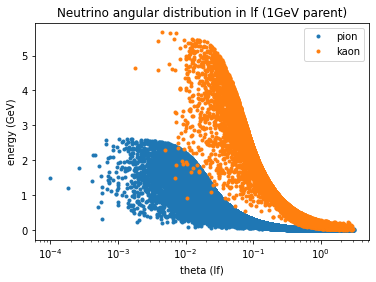

In [424]:
plt.semilogx(theta_lf_pi, energy_nu_lf_pi/eG,'.',label='pion') # Convert units of energy input in both lines to GeV (/eG)
plt.semilogx(theta_lf_K, energy_nu_lf_K/eG,'.',label='kaon')

plt.ylabel('energy (GeV)')
plt.xlabel('theta (lf)')
plt.title('Neutrino angular distribution in lf (1GeV parent)')
plt.legend()
plt.show()

### What conclusion can you draw from 3.3(c) and 3.3(d) about whether you can infer the parent particle type (pi or K) from a detected neutrino from either or both of 3.3(c) and 3.3(d). ***INCLUDE YOUR CONCLUSION AND YOUR REASONING IN YOUR DEBUGGING REPORT. *** 